- author: Lee Meng
- date: 2018-11-26 08:00
- title: Chartify：讓數據科學家效率加倍的 Python 資料視覺化工具
- slug: chartify-a-simple-yet-powerful-python-data-visualization-tool-which-boost-your-productivity-as-a-data-scientist
- tags: 資料視覺化, Python
- description: 此文會展示如何利用 Chartify，一個直觀且貼心的 Python 繪圖函式庫，來對如 2018 臺北市候選人得票數、歷年各大洲來台人數等公開數據做資料視覺化。如果你想要學習利用 Python 實現資料視覺化，但還不知道怎麼開始；或是覺得目前使用的工具不太直覺，想要提升自己工作效率的話，這篇就是為你而寫的。
- summary: 此文會展示如何利用 Chartify，一個直觀且貼心的 Python 繪圖函式庫，來對如 2018 臺北市候選人得票數、歷年各大洲來台人數等公開數據做資料視覺化。如果你想要學習利用 Python 實現資料視覺化，但還不知道怎麼開始；或是覺得目前使用的工具不太直覺，想要提升自己工作效率的話，這篇就是為你而寫的。
- image: chartify-post-cover.jpg
- image_credit_url: 

如果你正在學習 Python 和/或 資料視覺化，看這篇就對了。

身為一個數據科學家（**D**ata **S**cientist, DS），使用 R 語言或是 Python 來視覺化手邊的數據可說是件稀鬆平常，但卻不一定愉快的工作。很多時候你得要花個 10 到 20 分鐘「微整型」自己的圖表，寫一大堆瑣碎的 code 就只是為了調整 X 軸的數字格式，或是改變長條圖的方向。

## Chartify 來拯救世界

[Spotify 最近開源](https://labs.spotify.com/2018/11/15/introducing-chartify-easier-chart-creation-in-python-for-data-scientists/)了一個簡單卻同時強大的 Python 資料視覺化 Package：[Chartify](https://github.com/spotify/chartify)。我在工作中實際使用後覺得非常方便，所以想在這邊跟你分享我的經驗、並展示如何實際利用 Chartify 來視覺化一些台灣的 Open Data，讓你快速上手 Chartify。

!image
- chartify/chartify-gallery.jpg
- Chartify 圖表
- https://labs.spotify.com/2018/11/15/introducing-chartify-easier-chart-creation-in-python-for-data-scientists/

Chartify 有 3 大優點：
- 預設就很漂亮的圖表樣式
- 簡單直覺的 API
- 內建非常詳細的使用說明

透過此文你將會發現，相較於 [Matplotlib](https://matplotlib.org/) 或是 [ggplot2](https://ggplot2.tidyverse.org/) 等客製化能力強大但學習成本較高的繪圖工具，學習 Chartify 的投資報酬率非常地高，且你馬上就能將其實際應用在自己的工作裡頭。

## 這篇適合誰

只要你在學習資料科學或是 Python，這篇基本上都適合你：
- 菜鳥 DS：從頭了解如何使用 Chartify 及 Python 來產生漂亮圖表
- 老手 DS：利用 Chartify 來有效率地解決你目前 80 % 的繪圖需求
- 所有想要快速學會如何使用 Python 來做資料視覺化的你

!image
- chartify/alex-kotliarskyi-361099-unsplash.jpg

事不宜遲，讓我們馬上開始使用 Chartify 吧！

## Python 函式庫

接下來會畫不少圖，但在這篇文章我們只需要 [Pandas](https://pandas.pydata.org/) 以及 Chartify 就能完成所有圖表，輕鬆寫意。

In [1]:
import pandas as pd
import chartify

Loading BokehJS ...

你可以先跟著此文了解 Chartify 功能，等到自己手癢時再參考[官方 repo](https://github.com/spotify/chartify#installation) 安裝。

In [2]:
#ignore
from lib.DataTaipei import dataset

## 範例資料及 Tidy 格式

為了讓你有資料可以馬上開始嘗試各種圖表，Chartify 貼心地內建了一些簡單數據。你可以利用以下的方式將其取出並建立一個 Pandas 的 [DataFrame](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.html)：

In [3]:
df = chartify.examples.example_data()
df.head()

date country   fruit  unit_price  quantity  total_price
0 2017-10-21      US  Banana    0.303711         4     1.214846
1 2017-05-30      JP  Banana    0.254109         4     1.016436
2 2017-05-21      CA  Banana    0.268635         4     1.074539
3 2017-09-18      BR   Grape    2.215277         2     4.430554
4 2017-12-08      US  Banana    0.308337         5     1.541687

稍微檢視一下，你應該可以看出 `df` 這個 DataFrame 裡頭紀錄了不同國家 `country` 在不同日期 `date` 下，各個水果 `fruit` 的單價 `unit_price` 以及總價格 `total_price`。

但更重要的是，`df` 的格式是 Tidy 格式。要使用 Chartify 畫圖，基本上你的 DataFrame 都該轉換成 Tidy 格式。Tidy 格式又是什麼呢？依照 R 語言 ggplot2 的作者 [Hadley Wickham](http://hadley.nz/) 的解釋：
- 1 個變數只存在一欄裡頭（Column）
- 一列（Row）則代表 1 個觀測結果

比方說，彙整資料的 Pivot Table 大多不是 Tidy 格式：

In [4]:
df.pivot_table(
    values=['unit_price'], 
    index='country', 
    columns=['fruit'])

unit_price                              
fruit        Apple    Banana     Grape    Orange
country                                         
BR        0.978156  0.252695  2.022562  0.501151
CA        1.009426  0.249756  1.997512  0.504068
GB        1.007317  0.241405  2.002525  0.501009
JP        0.988600  0.249436  2.060732  0.499539
US        0.987463  0.252078  1.970634  0.504666

在這邊，明明都屬於 `fruit` 這個變數底下的 `Apple`、`Banana` 等水果，其單價 `unit_price` 卻都自成一欄，而這會造成我們畫圖的困難。簡而言之，只要是你想拿來畫圖的變數，其值都應該只存在一個 column 裏頭。想了解更多 Tidy 格式的細節，可以查看[這篇文章](https://tomaugspurger.github.io/modern-5-tidy.html)。

## 第一個 Chartify Chart
現在，讓我們馬上用 Chartify 針對水果的單價 `unit_price` 以及總價格 `total_price` 這 2 個變數畫一個簡單的散佈圖（Scatter Plot）：

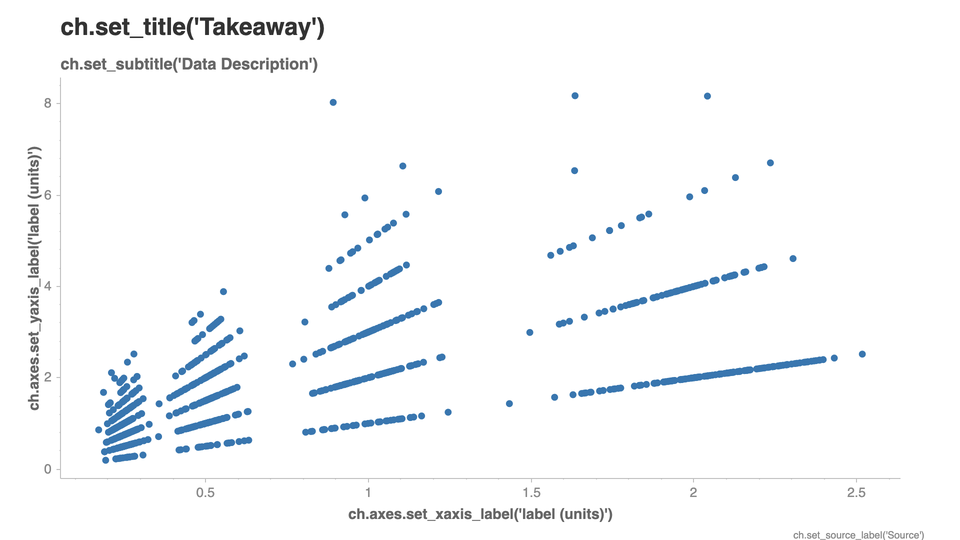

In [5]:
ch = chartify.Chart()
ch.plot.scatter(
    data_frame=df, 
    x_column='unit_price', 
    y_column='total_price'
)
ch.show('png')

<br/>
就算完全不熟 Chartify 或 Python，相信你也可以從程式碼感覺出來，使用 Chartify 畫圖非常地直覺。基本上定義好一個 `Chart` 物件 `ch`，並使用 `ch.plot.圖表類型` 的語法即可繪製各種美麗圖表。

最後，你會需要一個 `ch.show()` 來告訴 Chartify 將圖渲染（Render）出來。而這邊使用 `png` 只是告訴 Chartify 將圖表輸出為圖片而非 HTML，方便此部落格的使用。

再看一次剛剛的程式碼：

```python
ch = chartify.Chart()
ch.plot.scatter(
    data_frame=df, 
    x_column='unit_price', 
    y_column='total_price')
ch.show('png')
```

基本上所有 Chartify 圖表都需要數據（Pandas 的 DataFrame `df`），以及要在 X 及 Y 軸上呈現的變數/欄位名稱。

參數 `x_column` 及 `y_column` 的名稱就暗示著你，1 個 column 對應到 1 個變數。在這邊我們將水果單價 `unit_price` 對應到 X 軸、總價格 `total_price` 對應到 Y 軸。

你現在應該可以想像，如果我們手上的數據不是 `df` 而是前面的 `df.pivot_table` 的話，就無法輕易地用 Chartify 畫出這個散佈圖了。

!image
- chartify/tidy-vs-non-tidy.jpg

事實上，就算你不是用 Chartify 繪圖，Tidy 格式的數據也是比較推薦的。我們後面會看到，Tidy Data 可以讓你非常輕鬆地探索各個變數之間的關係。

## Chartify 提醒你提供重要訊息

雖說「一張圖勝過千言萬語」，有時為了讓你的分析結果更容易被其他人理解、吸收，你需要加上以下訊息：
- 圖表標題、副標
- X、Y 軸標籤
- 圖片的數據來源

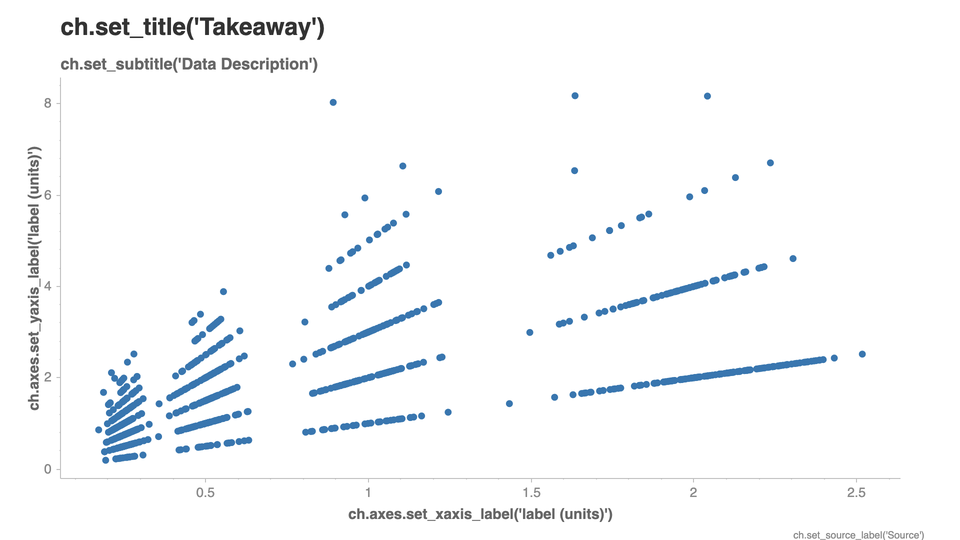

In [6]:
#ignore
ch = chartify.Chart()
ch.plot.scatter(
    data_frame=df, 
    x_column='unit_price', 
    y_column='total_price'
)
ch.show('png')

<br/>
重新檢視剛剛的散佈圖，你會發現 Chartify 跟其他繪圖工具相比非常地貼心。它在對應的位置直接列出程式碼，告訴你每個位置的文字該怎麼修改。

比方說你想修改標題（title）成「水果單價與總價格關係」，只要按照上圖指示在 `ch.show()` 指令之前輸入：

```python
ch.set_title('水果單價與總價格關係')
```

即可改變標題。

現在讓我們從善如流，依照 Chartify 的提示，將所有必要資訊填入看看：

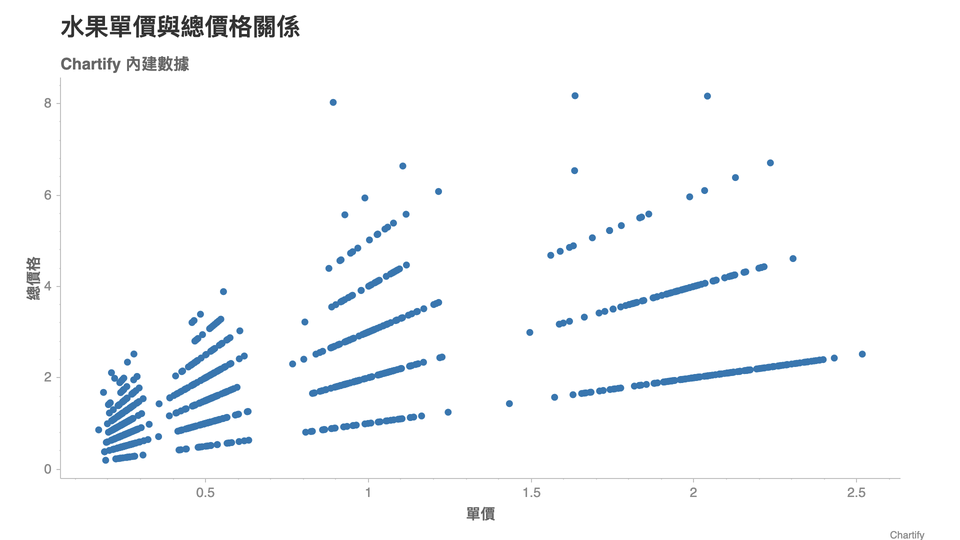

In [7]:
ch = chartify.Chart()
ch.plot.scatter(
    data_frame=df, 
    x_column='unit_price', 
    y_column='total_price')

# 這部分程式碼都已經被寫在圖上
# 照抄即可：）
ch.set_title('水果單價與總價格關係')
ch.set_subtitle('Chartify 內建數據')
ch.set_source_label('Chartify')
ch.axes.set_xaxis_label('單價')
ch.axes.set_yaxis_label('總價格')

ch.show('png')

<br/>
感覺充實許多了，不是嗎？

值得一提的是，現在數據科學家經常利用 [Jupyter Notebook](http://jupyter.org/) 進行分析，而裡頭的程式碼及圖表[常常在不同 Notebook 之間被搬來搬去](https://www.kdnuggets.com/2018/11/best-practices-notebooks-data-science.html)。為了讓你設計的圖表即使離開原來的 Notebook 也能讓人看得懂，加入如標題等資訊能大大提升圖表的可讀性。

## 凡事有例外，或是懶了

雖然我強烈建議標題一定要有，但有時候如果畫的圖只是要給你自己看，或者是你不需要標註副標和資料來源時，則可以將 `Chart` 的 `blank_labels` 設定為 `True` 來隱藏所有文字：

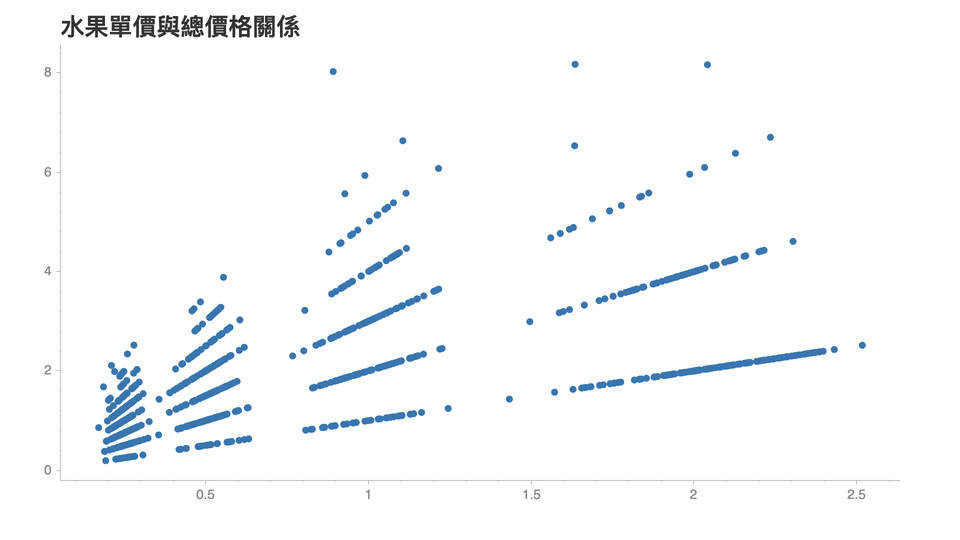

In [8]:
ch = chartify.Chart(
    blank_labels=True)
ch.plot.scatter(
    data_frame=df, 
    x_column='unit_price', 
    y_column='total_price')
ch.set_title('水果單價與總價格關係')
ch.show('png')

<br/>
貼心提示一鍵消失，看來其他人得猜猜到底水果單價是 X 還是 Y 軸了！

在對 Chartify 有了最基本的了解以後，讓我們以一些台灣的公開數據做點有趣的資料視覺化吧！

## 每年有多少人拜訪台灣？

台灣以風景、小吃以及人情味著名，但你曉得每年有多少人來台灣嗎？

!image
- chartify/photo-1508248467877-aec1b08de376.jpg

甚至再分細一點，在這些來台灣旅遊的人們當中，有多少是從歐洲來的呢？而又有多少是華僑呢？

為了回答這些問題，我們可以利用[政府資料開放平臺](https://data.gov.tw/about)裡頭的[歷年來台旅客國籍統計](https://data.gov.tw/dataset/45537)數據：

In [9]:
#ignore
# 資料前處理
# helper to get chinese region name
def get_region_name(s):
    tokens = s.split(' ')
    if '東南亞地區' in tokens:
        return tokens[1]
    elif len(tokens) >= 2:
        return tokens[0]

df = pd.read_csv('dataset/taiwan-visitors-nationality.csv', encoding='big5')

# 把合計的 row 去除 
df = df[~df.細分.apply(lambda x: 'Total' in x)]

# 將全區去除，並將華僑重新命名
df = df[~((df.國籍 == '全區') & ~(df.細分.apply(lambda x: 'Chinese' in x)))]
df.loc[df.國籍 == '全區', '國籍'] = '華僑'

# 去除英文名稱
df['nationality'] = df.細分.apply(get_region_name)

# 轉換 str 到 number
for col in df.columns:
    try:
        df[col] = df[col].apply(lambda x: x.replace(',', '').replace('-', '0')).astype(int)
    except (ValueError, AttributeError) as e:
        pass

df['continent'] = df['國籍']
df.drop(['國籍', '細分'], axis=1, inplace=True)
df = df.melt(id_vars=['continent', 'nationality'], var_name='year', value_name='visits')

# 將各大洲的國家匯總
df = df.groupby(['continent', 'year'])['visits'].sum().reset_index().sort_values('year').reset_index().drop('index', axis=1)
df.visits = df.visits.astype(int)

In [10]:
df.head(6)

continent  year   visits
0      亞洲地區  2002  1689854
1      歐洲地區  2002   209110
2      美洲地區  2002   439403
3        華僑  2002   539164
4       大洋洲  2002    48334
5      非洲地區  2002     9479

上面這個 DataFrame 實際上包含了從 2002 到 2016 年各大洲及華僑的訪台總人次。

值得一提的是，如果你實際下載[該資料集](https://data.gov.tw/dataset/45537)，會發現其格式很不 tidy。這個 DataFrame 事實上是經過大約 30 行 Pandas 的前處理而來，但為了讓你能專注在 Chartify 本身，在本文裡會省略所有資料前處理的說明。

接著讓我們以 Chartify 來視覺化此 DataFrame： 

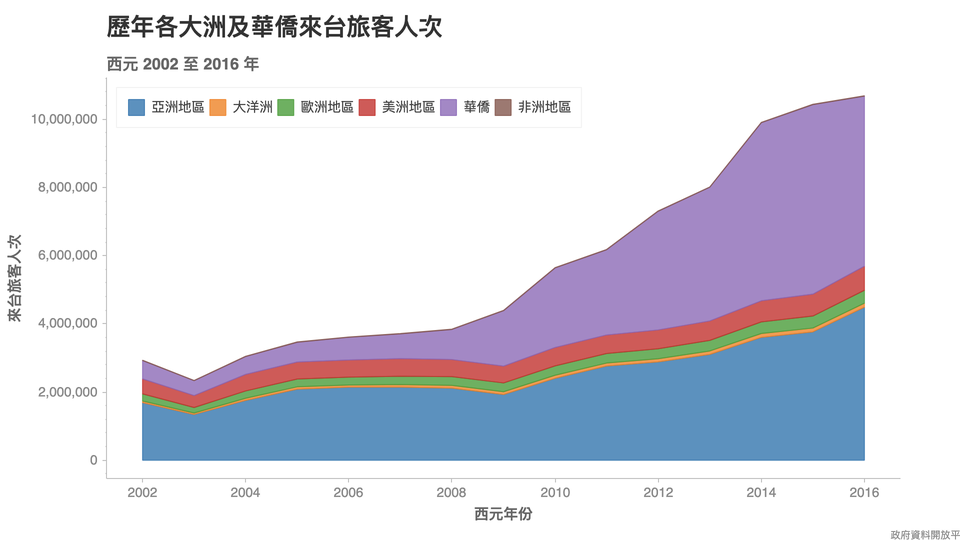

In [11]:
ch = chartify.Chart(
    x_axis_type='datetime')

ch.plot.area(
    data_frame=df, 
    x_column='year', 
    y_column='visits', 
    color_column='continent', 
    stacked=True)

# 所有繪圖工具都需要這些說明
ch.set_title('歷年各大洲及華僑來台旅客人次')
ch.set_subtitle('西元 2002 至 2016 年')
ch.set_source_label('政府資料開放平臺')
ch.axes.set_xaxis_label('西元年份')
ch.axes.set_yaxis_label('來台旅客人次')

ch.show('png')

<br/>
你可以觀察到，自 2009 年起訪台人數成長加快，而在約 2014 年時來台旅客人次突破 1,000 萬。另外你可以看到華僑的訪台人數增幅十分顯著。

回到 Chartify 本身。

扣除你在不管使用什麼繪圖工具都需要設定的標題、X 與 Y 軸標籤，事實上我們只用了 1 個關鍵的 `ch.plot.area` 函式，就畫出這張幾乎已經不需再做「微整型」的疊加區域圖了。

讓我們再仔細檢視一下 `ch.plot.area`：

```python
ch.plot.area(
    data_frame=df, 
    x_column='year', 
    y_column='visits', 
    color_column='continent', 
    stacked=True)
```

如同上一個散佈圖 `ch.plot.scatter` 的例子，我們告訴 Chartify `df` 是我們的 DataFrame，並將年份變數 `year` 對應到 X 軸、訪客人數變數 `visits` 對應到 Y 軸。

接著我們告訴 Chartify，我們想要依照洲 `continent` 來畫不同「顏色」的子區域，並透過 `stacked=True` 來將這些子區域疊加起來。

另外因為我們的 X 軸是時間類型的變數（年份），為了幫助 Chartify 畫圖，我們在第一行設定 `Chart` 時需要將 `x_axis_type` 設定為 `datetime`： 

```
ch = chartify.Chart(
    x_axis_type='datetime')
```

自此大功告成，你只需要再輸入 `ch.show()`，美麗的疊加區域圖自動產生。不需要再花時間調整一大堆瑣碎的樣式（style）就能將結果跟別人分享，正是 Chartify 強大與貼心之處。

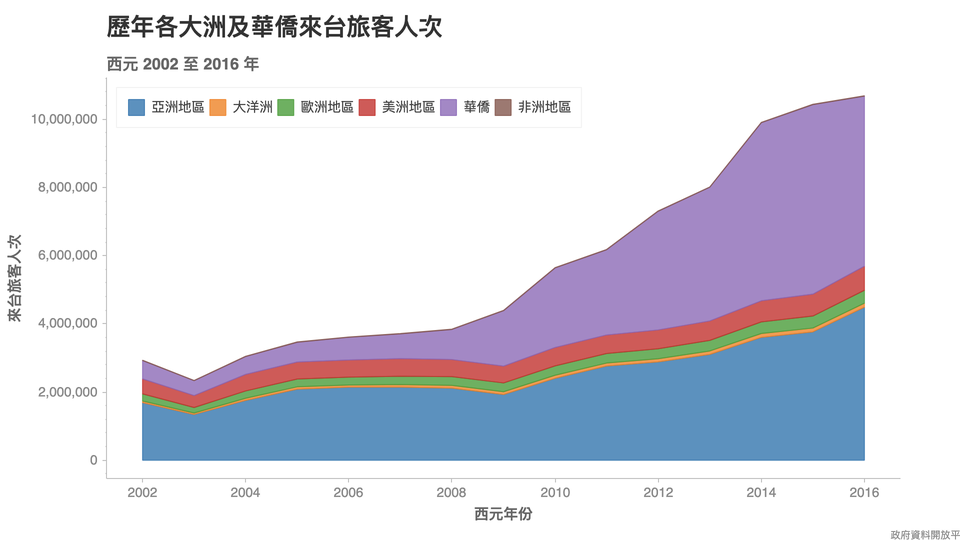

In [12]:
#ignore
ch = chartify.Chart(
    x_axis_type='datetime')

ch.plot.area(
    data_frame=df, 
    x_column='year', 
    y_column='visits', 
    color_column='continent', 
    stacked=True)

ch.set_title('歷年各大洲及華僑來台旅客人次')
ch.set_subtitle('西元 2002 至 2016 年')
ch.set_source_label('政府資料開放平臺')
ch.axes.set_xaxis_label('西元年份')
ch.axes.set_yaxis_label('來台旅客人次')

ch.show('png')

## 一個參數就能轉變圖表

當然，我們也可以選擇不將各大洲的區域疊加起來，讓它們從同樣的基準點渲染。

這時只需要將上張圖的 `ch.plot.area` 函式裡頭的 `stacked=True` 拿掉即可：

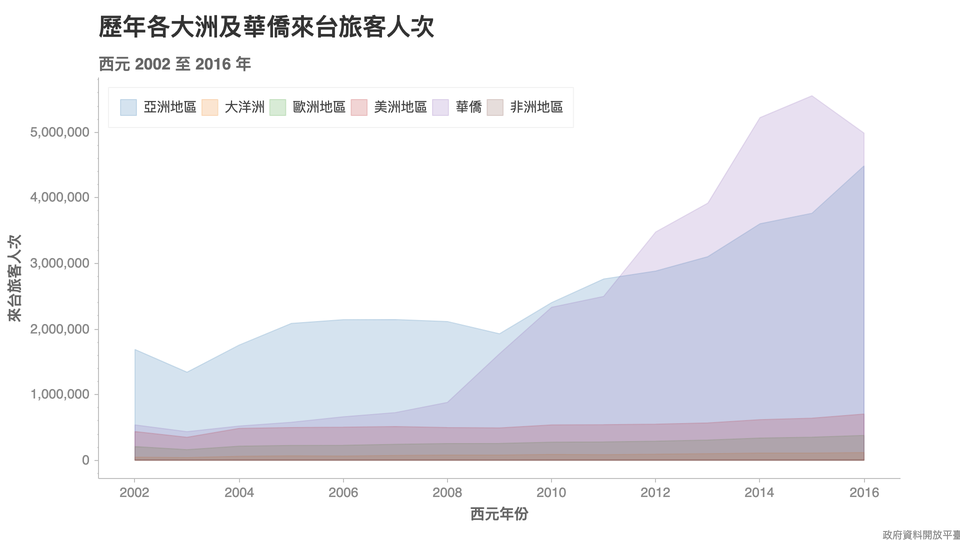

In [13]:
#ignore
ch = chartify.Chart(
    x_axis_type='datetime')

ch.plot.area(
    data_frame=df, 
    x_column='year', 
    y_column='visits', 
    color_column='continent')

ch.set_title('歷年各大洲及華僑來台旅客人次')
ch.set_subtitle('西元 2002 至 2016 年')
ch.set_source_label('政府資料開放平臺')
ch.axes.set_xaxis_label('西元年份')
ch.axes.set_yaxis_label('來台旅客人次')

ch.show('png')

<br/>
各自渲染的區域圖讓我們很清楚地看到：從 2012 年開始，光是華僑的訪台人數就超越整個亞洲訪客人次，成為來台旅客的最主要來源，佔了將近一半。

回到 Chartify 本身，你應該已經發現自己甚至不需花時間來手動調整各個子區域的透明度（alpha），省了不少時間。

## 所以大家來台灣做什麼？

我們剛剛利用區域圖（Area Plot）觀察了歷年各大洲訪台人數的變化，你會不會好奇他們都來這邊做什麼？

!image
- chartify/andrew-haimerl-526180-unsplash.jpg

至少我是蠻好奇的。這次一樣讓我們從[政府資料開放平臺](https://data.gov.tw/about)取得數據。[歷年來台旅客來台目的統計](https://data.gov.tw/dataset/45512)看起來是一個不錯的選擇：

In [14]:
#ignore
# helper to get chinese region name
def get_region_name(s):
    tokens = s.split(' ')
    if '東南亞地區' in tokens:
        return tokens[1]
    elif len(tokens) >= 2:
        return tokens[0]

# data preprocessing
df = pd.read_csv("dataset/taiwan-travel.csv", encoding='UTF-8')

# 把合計的 row 去除 
df = df[~df.細分.apply(lambda x: 'Total' in x)]
df = df[~(df.居住地 == '全區')]

# 去除英文名稱
df['region'] = df.細分.apply(get_region_name)
# 轉換 str 到 number
for col in df.columns:
    try:
        df[col] = df[col].apply(lambda x: x.replace(',', '')).astype(int)
    except (ValueError, AttributeError) as e:
        pass

df['continent'] = df['居住地']
df['year'] = df['年別']
df = df.drop(['合計', '年別', '居住地', '細分'], axis=1)
df = df.melt(id_vars=['year', 'continent', 'region'], var_name='purpose', value_name='visits')

# 只拿 2016 年的數據來看
df = df[df.year == 2016]

# 分州別的目的以及人次
df = df.groupby(['continent','purpose'])['visits'].sum().reset_index()

In [15]:
df.head(8)

continent purpose   visits
0      亞洲地區      其他  1531958
1      亞洲地區      展覽    10814
2      亞洲地區      探親   221338
3      亞洲地區      會議    47428
4      亞洲地區      業務   530369
5      亞洲地區      求學    53118
6      亞洲地區      觀光  7192696
7      亞洲地區      醫療    37072

雖然上面只列出亞洲地區，事實上這個 `df` 裡頭記載在 2016 年依照不同目的，各大洲訪台旅客的人數。讓我們再次使用 Chartify 來做視覺化吧！

（當然，這個 DataFrame 也經過前處理，被轉換成適合繪圖的 Tidy 格式：一欄一變數）

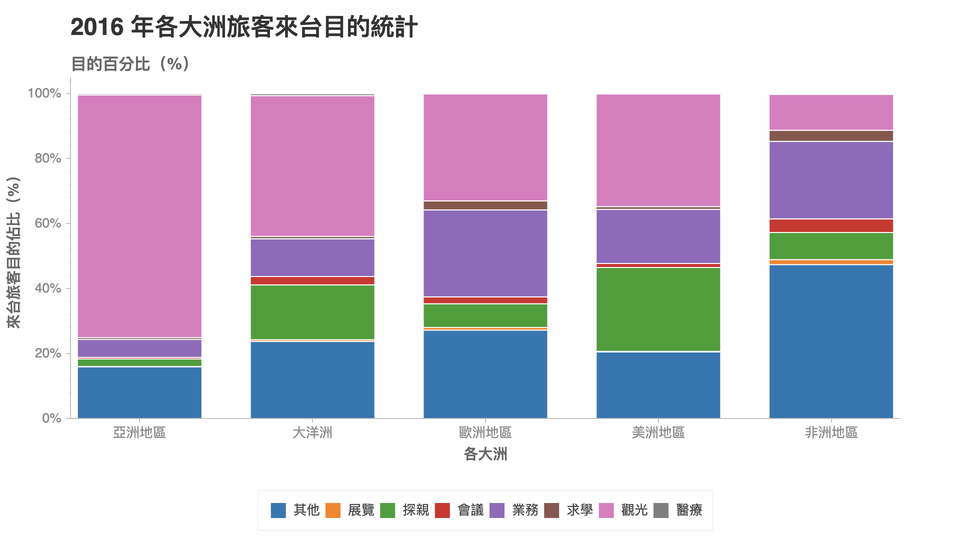

In [16]:
ch = chartify.Chart(
    blank_labels=True,
    x_axis_type='categorical')

ch.plot.bar_stacked(
    data_frame=df, 
    categorical_columns='continent', 
    stack_column='purpose', 
    numeric_column='visits', 
    normalize=True)

# 將圖例移到圖表下方，方便閱讀
ch.set_legend_location('outside_bottom')

# Chartify 支持 Chain Operation
(ch.set_title('2016 年各大洲旅客來台目的統計')
 .set_subtitle('目的百分比（％）')
 .axes.set_xaxis_label('各大洲')
 .axes.set_yaxis_label('來台旅客目的佔比（％）')
 .show('png'))

<br/>
你從這張圖可以觀察到不少有趣的現象：
- 亞洲國家超級喜歡來台灣觀光
- 歐洲及非洲的來台求學比例較其他洲高
- 美洲國家來台探親的需求意外地高
- 非洲地區的「其他」目的耐人尋味

要利用 Chartify 做出一個像這樣訊息豐富的圖表也十分直覺：

```python
ch = chartify.Chart(
    blank_labels=True,
    x_axis_type='categorical')

ch.plot.bar_stacked(
    data_frame=df, 
    categorical_columns='continent', 
    stack_column='purpose', 
    numeric_column='visits', 
    normalize=True)
```

我想看過上個區域圖，你應該已經可以輕鬆地掌握這段程式碼的意涵，不過讓我再囉唆一下。

為了在 X 軸上顯示多個長條且 1 個長條能代表 1 個洲，我在 `chartify.Chart` 裡頭設置了 `x_axis_type='categorical'`。這是因為洲 `continent` 是一個分類型變數（Categorical Variables），且之後將被顯示在 X 軸上。

接著我在 `ch.plot.bar_stacked` 函式裏頭告訴 Chartify 分類變數為 `continent`，且我們想要畫出訪台人數的實際數字 `visits`，再用不同顏色表達不同目的 `purpose` 。

另外因為我們想觀察的是每一洲裡頭，各個目的佔該洲全部目的的比例，使用 `normalize=True` 來將每個長條顯示成百分比。

最後再加上 `ch.show()` 就大功告成：

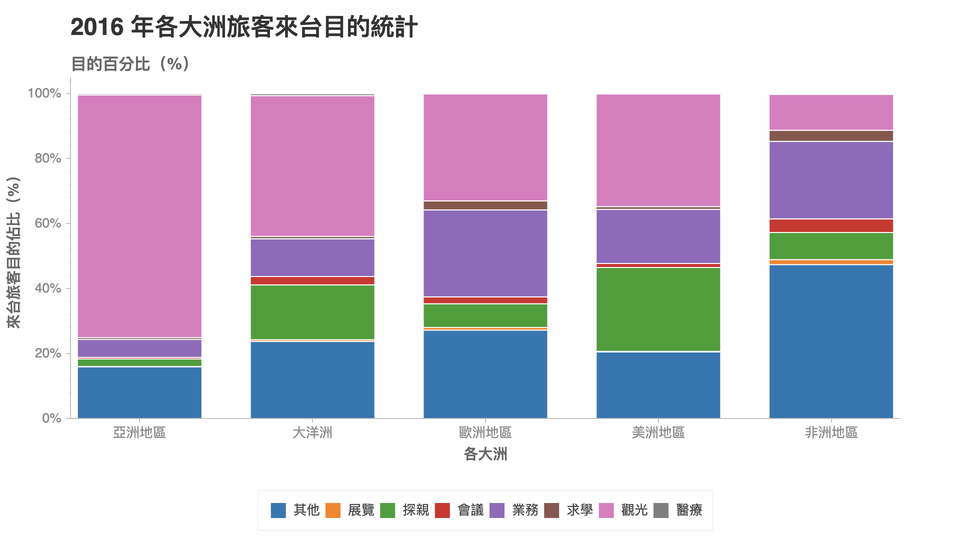

In [17]:
#ignore
ch = chartify.Chart(
    blank_labels=True,
    x_axis_type='categorical')

ch.plot.bar_stacked(
    data_frame=df, 
    categorical_columns='continent', 
    stack_column='purpose', 
    numeric_column='visits', 
    normalize=True)

# 將圖例移到圖表下方，方便閱讀
ch.set_legend_location('outside_bottom')

# Chartify 支持 Chain Operation
(ch.set_title('2016 年各大洲旅客來台目的統計')
 .set_subtitle('目的百分比（％）')
 .axes.set_xaxis_label('各大洲')
 .axes.set_yaxis_label('來台旅客目的佔比（％）')
 .show('png'))

## 一個字母就能翻轉世界

在很多繪圖工具像是 Matplotlib，要將長條圖轉向是一個非常不直覺的事情。但在 Chartify 裡，你只要改變一個英文字母。

上張圖的 `chartify.Chart`：

```python
ch = chartify.Chart(
    blank_labels=True,
    x_axis_type='categorical')
```

我們只要將其中的 `x_axis_type` 改成 `y_axis_type`，其他部分都不變，Chartify 就知道該轉換方向了：

```python
ch = chartify.Chart(
    blank_labels=True,
    y_axis_type='categorical')
```

而本來的長條圖會變成這樣：

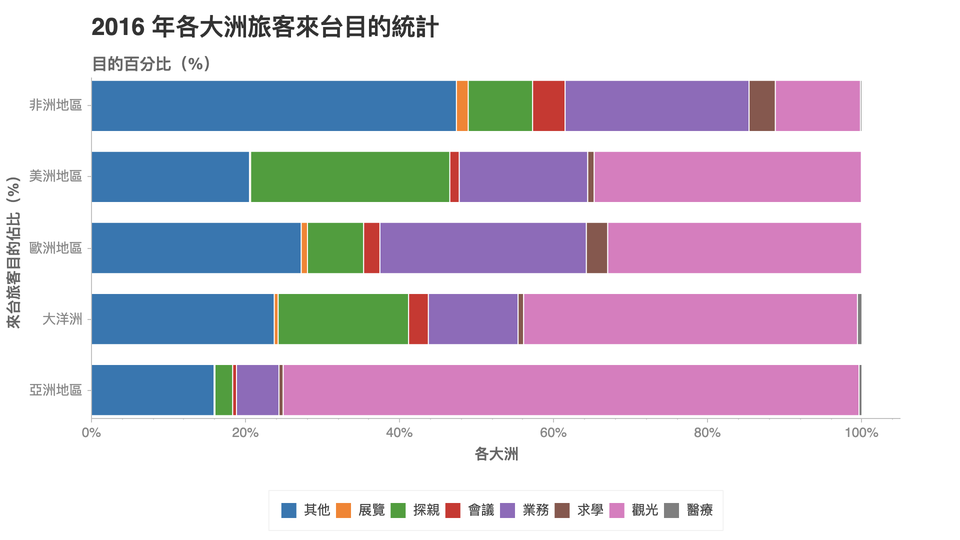

In [18]:
#ignore
ch = chartify.Chart(
    blank_labels=True,
    y_axis_type='categorical')

ch.plot.bar_stacked(
    data_frame=df, 
    categorical_columns='continent', 
    stack_column='purpose', 
    numeric_column='visits', 
    normalize=True)

ch.set_legend_location('outside_bottom')

(ch.set_title('2016 年各大洲旅客來台目的統計')
 .set_subtitle('目的百分比（％）')
 .axes.set_xaxis_label('各大洲')
 .axes.set_yaxis_label('來台旅客目的佔比（％）')
 .show('png'))

<br/>
樣式也完全不需調整，再次省了我們不少時間。你甚至可以看出大洋洲的來台訪客之中，還有一點點的醫療需求。

在結束本文之前，再讓我們看最後 2 個公開的統計數據：
- 2017 年臺北市交通意外事故
- 2018 年臺北市候選人得票數

## 在台北市，哪些地區比較多意外事故？

這問題重要嗎？嗯 .. 雖然我現在在東京，知道這件事情或許可以增加我回台之後在台北街道上的存活率，何樂而不為？

<center>
    <img src="{filename}/images/chartify/Taipei_Districts.jpg" style="width: 50%">
</center>
<center>
    臺北市行政區劃
    <br>
    <br>
</center>

要回答這個問題，我們可以從[臺北市政府資料開放平台](https://data.taipei/index)裡頭的[交通事故資料](https://data.taipei/#/dataset/detail?id=2f238b4f-1b27-4085-93e9-d684ef0e2735)找出一些端倪：

In [21]:
#ignore
# preprocessing
df_raw = pd.read_csv(
    "https://data.taipei/api/getDatasetInfo/downloadResource?id=2f238b4f-1b27-4085-93e9-d684ef0e2735&rid=ea731a84-e4a1-4523-b981-b733beddbc1f",
    encoding='big5')
df = df_raw.copy()
df['district'] = df.區序.apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
df['sex'] = df['性別']
df['deaths'] = df['死亡人數']
df['injury'] = df['受傷人數']
df = df[df.性別.isin([1, 2])].groupby(['district', 'sex'])[['deaths', 'injury']].sum().reset_index().sort_values('injury')
df.sex = df['sex'].apply(lambda x: '男性' if x == 1 else '女性')
df = df.reset_index().drop('index', axis=1)

In [22]:
#ignore
df = df.loc[:, ['district', 'sex', 'injury']]

In [23]:
df.head()

district sex  injury
0      南港區  女性     799
1      萬華區  女性    1084
2      松山區  女性    1146
3      大同區  女性    1336
4      士林區  女性    1660

這個 DataFrame 裡頭紀錄了台北市在整個 2017 年裡，各個行政區因為交通事故而造成的受傷人數，男女分計。

讓我們試著用 Chartify 視覺化這個 DataFrame：

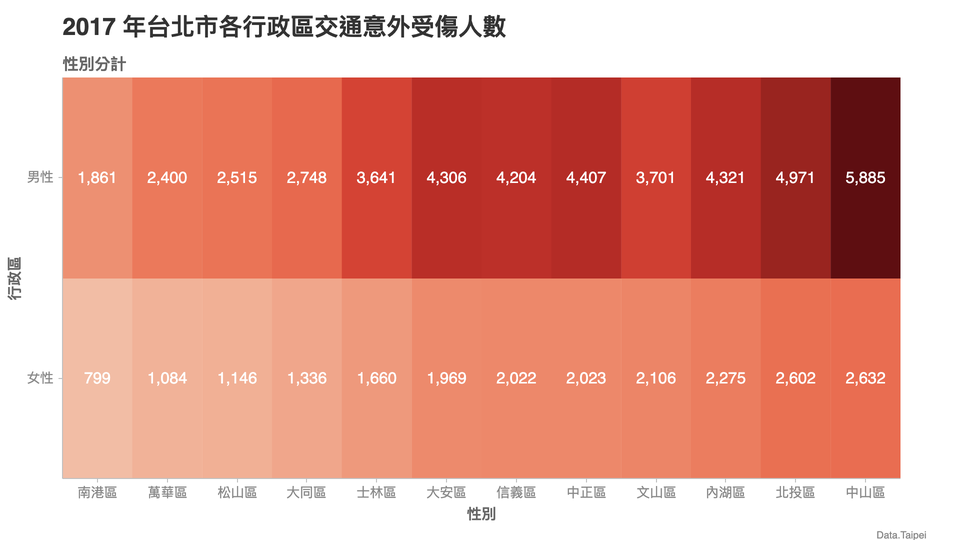

In [24]:
ch = chartify.Chart(
    x_axis_type='categorical', 
    y_axis_type='categorical')

ch.plot.heatmap(
    data_frame=df, 
    y_column='sex', 
    x_column='district', 
    color_column='injury', 
    text_column='injury', 
    color_palette='Reds', 
    text_format='{:,.0f}')

(ch.set_title('2017 年台北市各行政區交通意外受傷人數')
 .set_subtitle('性別分計')
 .set_source_label("Data.Taipei")
 .axes.set_xaxis_label('性別')
 .axes.set_yaxis_label('行政區')
 .show('png'))

<br/>
結果跟你想像的一樣嗎？

普遍來說，男性的受傷人數較女性來得高（2 倍以上），而看起來在中山區的時候可能要特別注意交通安全！

當然，上面這句是玩笑話。因為我們手上並沒有數據能用來計算各個區域的受傷率，所以不能說中山區的受傷總人數第一名，就一定比較不安全。

## Chartify 心法及資料視覺化

看了這麼多的實例，相信上張圖的程式碼不需要我再逐行解釋了。

事實上，你可能已經逐漸熟悉用 Chartify 繪圖的套路了：
1. 定義一個 Chart 物件
2. 決定 X、Y 軸的變數型態（如 `categorical`）
3. 決定圖表類型（如 `scatter`、`heatmap` 等）
4. 決定各個變數要對應到什麼[視覺變數](https://leemeng.tw/data-visualization-from-matplotlib-to-ggplot2.html)（如 X 軸、顏色等）
5. 加入標題與 X、Y 軸標籤
6. 渲染圖表，開心分享結果

我自己把上述非常簡化的步驟稱為「 Chartify 心法 」。但事實上不管你用什麼繪圖工具都會走過類似的步驟，只是可能因為那些工具沒有那麼直覺，讓你需要不斷地「微整型」圖表，導致見樹不見林的窘境。

這篇文章因為篇幅有限，沒有辦法面面俱到，但如果你對第 4 點的視覺變數以及如何增加 Data Ink 有興趣，可以參考我之前寫的[淺談資料視覺化以及 ggplot2 實踐](https://leemeng.tw/data-visualization-from-matplotlib-to-ggplot2.html)

## 結語

呼！我們的 Chartify 旅程到此告一段落了！

這是一篇長度出乎自己當初預期的文章。但我相信（也希望你認同），閱讀此篇的投資報酬率是非常地高的。

不管你是老手 / 菜鳥資料科學家或只是對 Python 有興趣，應該都能從這篇學到一些資料視覺化的基礎以及 Chartify 的使用方式。

目前的 Chartify 當然不能解決所有繪圖需求，但已經能解決最常見的 80 % 使用案例，且我對其發展的前景也抱持著樂觀態度。

!image
- chartify/work-731198_1280.jpg

接下來你可以：
- 前往 [官方 Github](https://github.com/spotify/chartify) 查看 Chartify 的安裝以及其他指南
- 利用本章學到的基礎，探索 Chartify 提供的[教學 Notebook](https://github.com/spotify/chartify/blob/master/examples/Chartify%20Tutorial.ipynb) 以及瀏覽[所有範例圖表](https://github.com/spotify/chartify/blob/master/examples/Examples.ipynb)
- 實際應用本文所學在自己的生活或是工作裡頭，快速提升效率
- 分享本文給可能會對 Python 或資料視覺化感興趣的朋友，讓他們感謝你

就是這樣啦！

由衷地感謝你的閱讀，我們下次見！

## Chartify 畫廊

雖然現在沒有什麼圖，但之後我會將利用 Chartify 視覺化 Open Data 的圖表以及程式碼放在這邊供你參考。

也非常歡迎留言或是寄信給我，分享你實際應用 Chartify 以後做出來的圖表以及數據，我會將你的圖及名字附在這裡：）

### Lollipop Chart

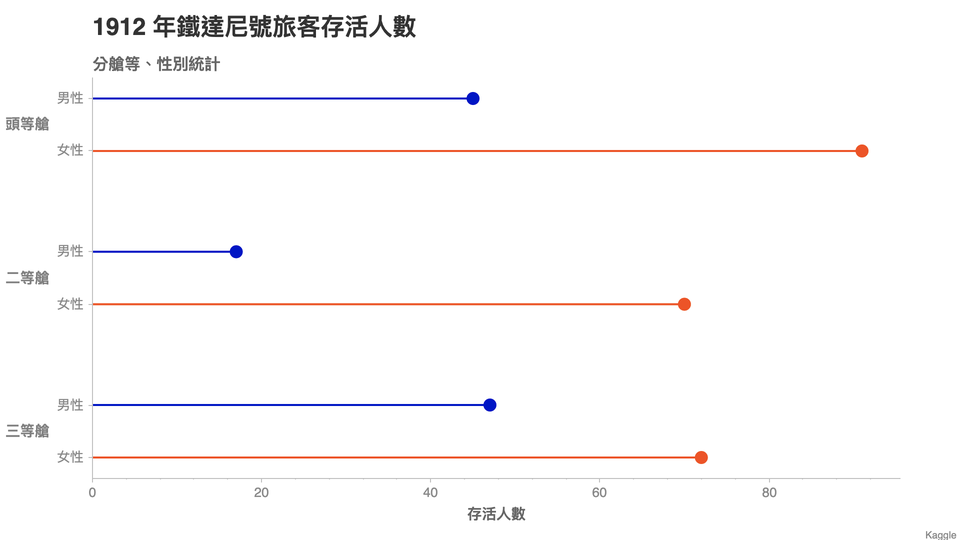

In [26]:
df = pd.read_csv('dataset/titanic-train.csv')

df_group = df.groupby(['Pclass', 'Sex'])['Survived'].sum().reset_index()
df_group.Pclass.replace({1: '頭等艙', 2: '二等艙', 3: '三等艙'}, inplace=True)
df_group.Sex.replace({'female': '女性', 'male': '男性'}, inplace=True)

ch = chartify.Chart(
    blank_labels=True,
    y_axis_type='categorical')
ch.style.set_color_palette('categorical', ['OrangeRed', 'Mediumblue'])
ch.plot.lollipop(
    data_frame=df_group, 
    categorical_columns=['Pclass', 'Sex'], 
    numeric_column='Survived',
    color_column='Sex',
    categorical_order_by='labels',
    categorical_order_ascending=True
)

ch.set_title('1912 年鐵達尼號旅客存活人數')
ch.set_subtitle('分艙等、性別統計')
ch.set_source_label('Kaggle')
ch.axes.set_xaxis_label('存活人數')
ch.axes.set_yaxis_tick_orientation(['horizontal', 'horizontal'])
ch.show('png')

In [30]:
#ignore
### Grid plot 
# 目前 Chartify 還沒有繪製 grid plot 的 API，但已經[有人提出 Issues](https://github.com/spotify/chartify/issues/40)。

# 官方則建議我們在此功能釋出前，利用 Bokeh 實現：

In [29]:
#ignore
# import chartify
# from bokeh.layouts import gridplot
# from bokeh.io import show

# chart_1 = chartify.Chart(layout='slide_50%').set_title('Chart 1')
# chart_2 = chartify.Chart(layout='slide_50%').set_title('Chart 2')
# chart_3 = chartify.Chart().set_title('Chart 3')

# # Create a list of figure objects to pass to gridplot
# chart_figures = [chart.figure for chart in (chart_1, chart_2, chart_3)]

# # make a grid
# grid = gridplot(chart_figures, ncols=2,)

# # show the results
# show(grid)